<a href="https://colab.research.google.com/github/cizzeso/DTS22_TS4/blob/kristanto-setyo-utomo/ts4_kris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library yang diperlukan untuk mengolah data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

Menghubungkan dengan drive penyimpan data (google)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengarahkan ke file sumber data yang akan diolah pada drive sebagai dataset

In [3]:
#ubah pathnya sesuai lokasi dataset 
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid_impact_on_airport_traffic.csv')

In [4]:
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [5]:
df.tail()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
7242,Daily,2020-06-05,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7243,Daily,2020-10-03,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7244,Daily,2020-07-16,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7246,Daily,2020-08-30,1.0,Seattle-Tacoma International,68,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


In [6]:
# cek masing-masing kolom 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


Mengecek type dari masing-masing data

In [7]:
# kolom 'Date' masih memiliki object type. maka harus diubah ke type datetime

df['Date'] = pd.to_datetime(df['Date'])

df.dtypes

AggregationMethod            object
Date                 datetime64[ns]
Version                     float64
AirportName                  object
PercentOfBaseline             int64
Centroid                     object
City                         object
State                        object
ISO_3166_2                   object
Country                      object
Geography                    object
dtype: object

In [8]:
# Check the null values
df.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [9]:
# Check the values
df.isna().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [10]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
count,7247,7247,7247.0,7247,7247.000000,7247,7247,7247,7247,7247,7247
unique,1,262,NaN,28,NaN,28,27,23,23,4,28
top,Daily,2020-04-03 00:00:00,NaN,Hartsfield-Jackson Atlanta International,NaN,POINT(-84.4279188822754 33.6410758198944),New York,New York,US-NY,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
freq,7247,28,NaN,262,NaN,262,523,523,523,4441,262
first,NaN,2020-03-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.0,NaN,66.651442,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,22.134433,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.0,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# melihat nama negara

df['Country'].unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

In [12]:
# mengubah nama United States of America (the) menjadi America saja

df['Country'] = df['Country'].str.replace("United States of America (the)", "America", regex=False).astype(object)

df['Country'].unique()

array(['Australia', 'Chile', 'Canada', 'America'], dtype=object)

In [13]:
# menambah kolom baru mingguan

df['Mingguan'] = df['Date'].map(lambda x: x.weekday())

wk_list = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

df['Mingguan'] = [wk_list[idx] for idx in df['Mingguan']]

df.columns

Index(['AggregationMethod', 'Date', 'Version', 'AirportName',
       'PercentOfBaseline', 'Centroid', 'City', 'State', 'ISO_3166_2',
       'Country', 'Geography', 'Mingguan'],
      dtype='object')

Visualisasi

In [14]:
# melihat persen of base line masing-masing negara

percentofbaseline_mean_by_country = df.groupby('Country', as_index=False) \
                                        .agg({'PercentOfBaseline': 'mean'}) \
                                        .rename(columns={'PercentOfBaseline': 'percentofbaseline_mean'}) \
                                        .sort_values('percentofbaseline_mean', ascending=False)

percentofbaseline_mean_by_country     

,Country,percentofbaseline_mean
2,Canada,77.409347
0,America,64.460932
1,Australia,37.750973
3,Chile,34.273109


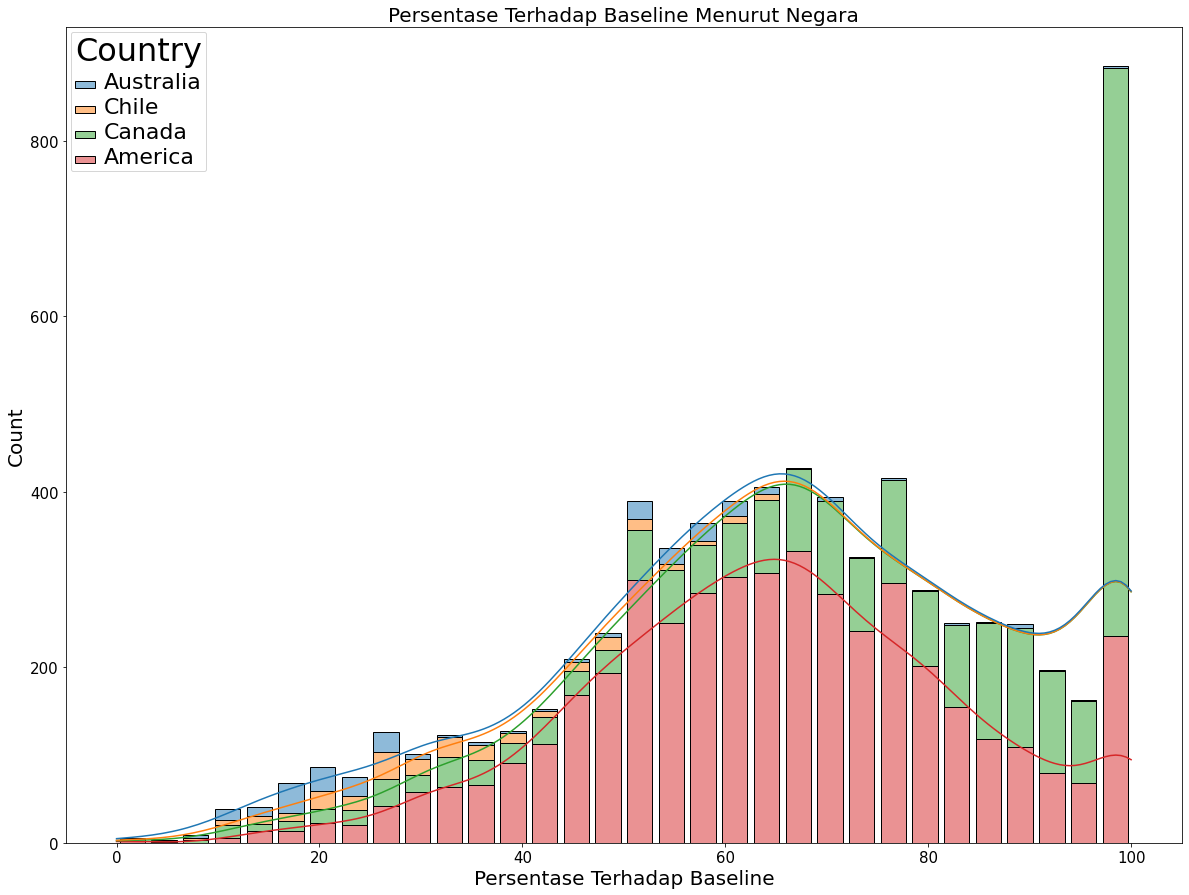

In [15]:
fig = plt.figure(figsize=(20,15))

ax = sns.histplot(data=df, x = 'PercentOfBaseline',kde=True,hue='Country', multiple='stack', shrink = .8)

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

plt.ylabel("Count",size=20)
plt.xlabel("Persentase Terhadap Baseline",size=20)
plt.title('Persentase Terhadap Baseline Menurut Negara', size = 20)
plt.tick_params(labelsize=15)
plt.show()

In [27]:
#Membuat Total Airport dari masing - masing negara
country_name = ['Australia', 'Chile', 'Canada', 'America']
count_list = []
for i in country_name:
    airport_count = len(df.AirportName[df['Country']==i].value_counts())
    count_list.append(airport_count)
count_list

[1, 1, 9, 17]

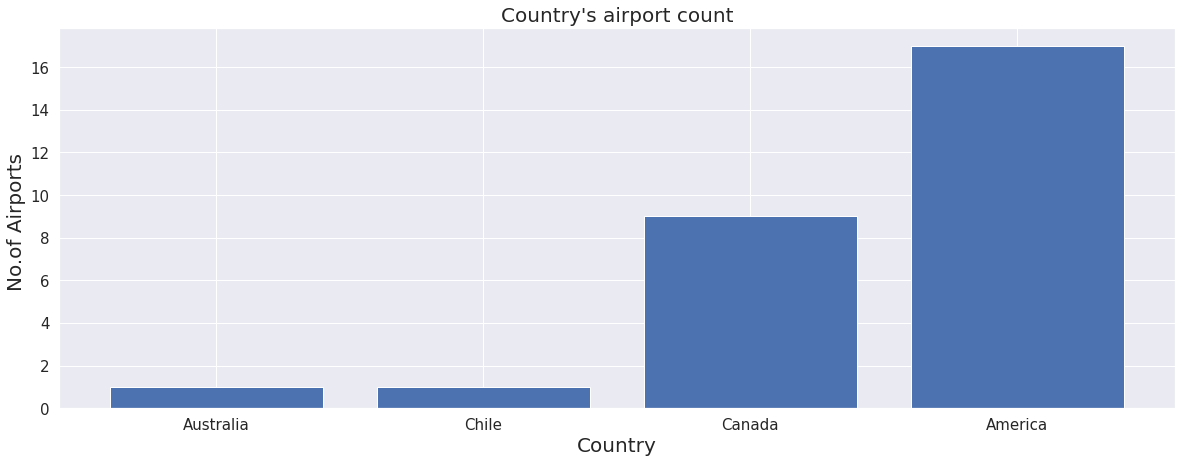

In [28]:
fig = plt.figure(figsize=(20,7))
plt.bar(country_name, count_list)
plt.ylabel("No.of Airports ",size=20)
plt.xlabel("Country",size=20)
plt.title("Country's airport count", size = 20)
plt.tick_params(labelsize=15)
plt.show()

Text(0, 0.5, 'Airport name')

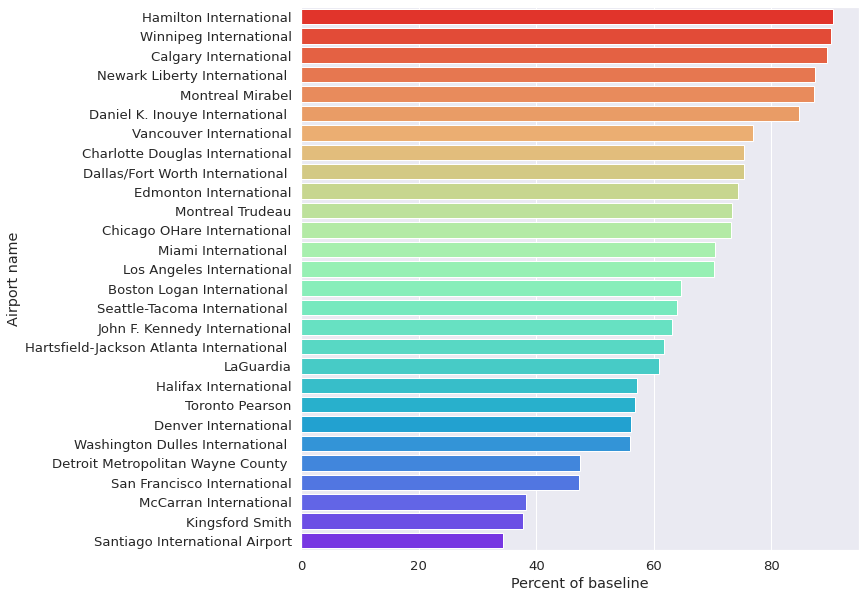

In [50]:
#Percent Of Baseline dari Jumlah Total Bandara
df1 = df.groupby("AirportName")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale =1.2)
plt.figure(figsize = [10,10])
sns.barplot(data = df1, x = 'PercentOfBaseline', y = 'AirportName',palette = 'rainbow_r')
plt.xlabel('Percent of baseline')
plt.ylabel("Airport name")

Text(0, 0.5, 'Percent of baseline')

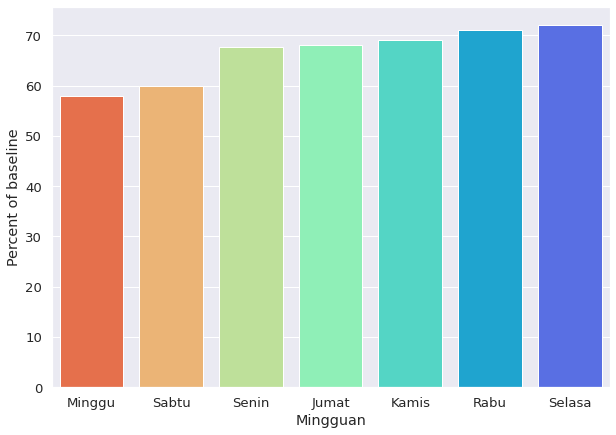

In [49]:
# membuat plot time series rata-rata PercentOfBaseline berdasarkan hari

df2 = df.groupby("Mingguan")['PercentOfBaseline'].mean().sort_values(ascending = True).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,7])
sns.barplot(data = df1, x=  'Mingguan', y = 'PercentOfBaseline',palette = 'rainbow_r')
plt.ylabel('Percent of baseline')

**MAP (koodinat)**

In [17]:
# modifikasi data 'Centroid' untuk mengambil data lon dan lat

df["lon"] = df.Centroid.apply(lambda x: x.split(" ")[0].replace("POINT("," "))
df["lat"] = df.Centroid.apply(lambda x: x.split(" ")[1].replace(")"," "))

In [18]:
# Ploting rata-rata 'PercentOFBaseline' pada peta berdasarkan koordinat dan nama Negara + Kota

df1 = df.groupby(["Country","City",'lat','lon'])['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
fig = px.scatter_geo(df1,
                     lat='lat',
                     lon='lon',
                     hover_name="Country",
                     color = 'Country',
                     hover_data = ['PercentOfBaseline',"City"],
                     labels = {"PercentOfBaseline":"Percent of Baseline"}
                    )

In [19]:
fig.update_geos(showocean = True,
                oceancolor = 'LightCyan',
                lakecolor = 'LightSteelBlue',
                showlakes = True,
               
               )
fig.show()

**Analisis Menurut Negara**

**America**

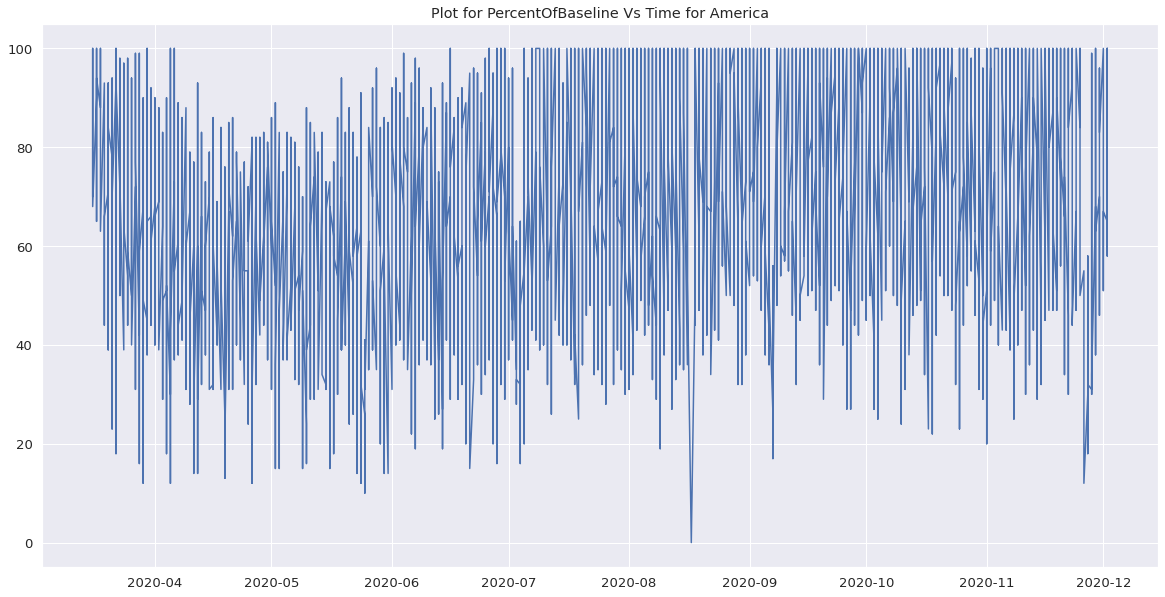

In [20]:
df_America = df[df['Country']=='America']
df_America = df_America.sort_values(by="Date")
df_America.set_index('Date',inplace=True)

plt.figure(figsize=(20,10))
plt.plot(df_America['PercentOfBaseline'])
plt.title("Plot for PercentOfBaseline Vs Time for America")
plt.show();

**Australia**

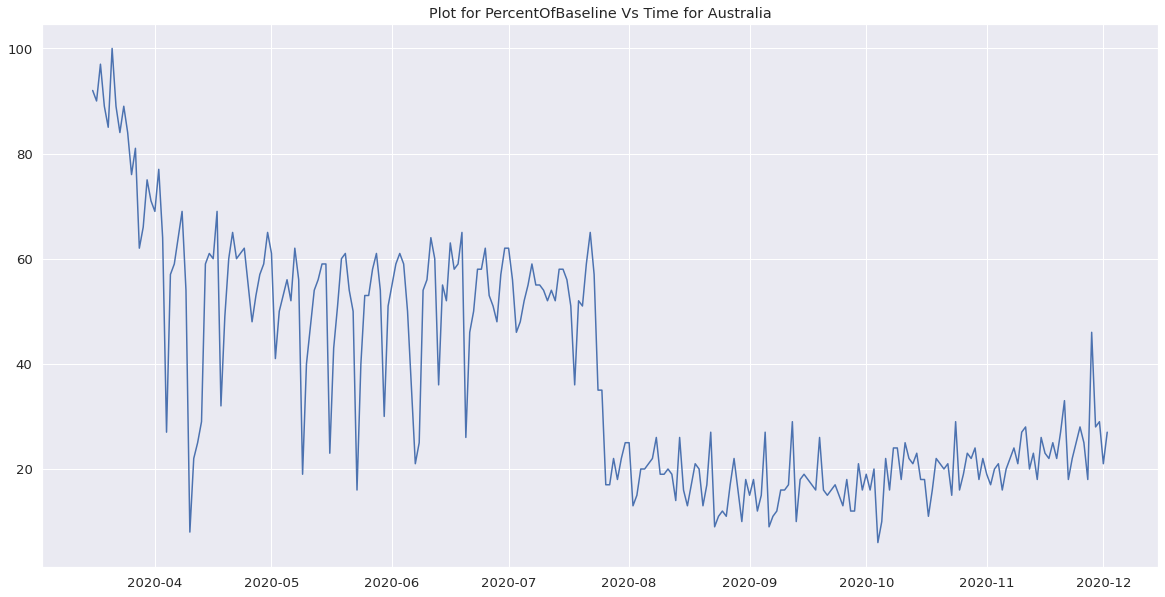

In [21]:
df_Australia = df[df['Country']=='Australia']
df_Australia = df_Australia.sort_values(by="Date")
df_Australia.set_index('Date',inplace=True)

plt.figure(figsize=(20,10))
plt.plot(df_Australia['PercentOfBaseline'])
plt.title("Plot for PercentOfBaseline Vs Time for Australia")
plt.show();

**Canada**

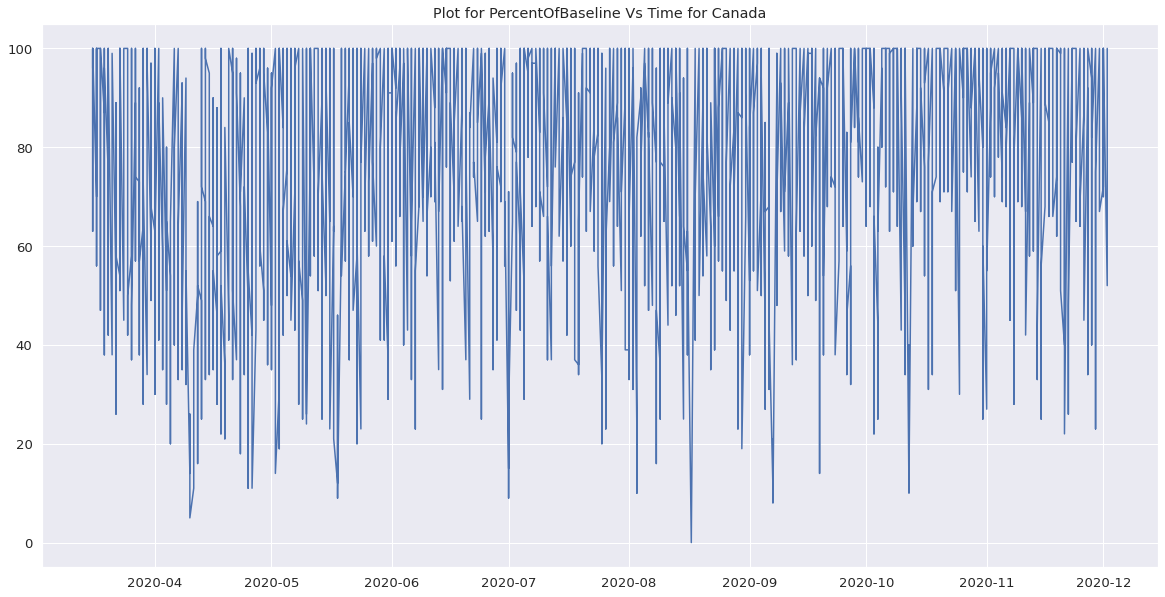

In [22]:
df_Canada = df[df['Country']=='Canada']
df_Canada = df_Canada.sort_values(by="Date")
df_Canada.set_index('Date',inplace=True)

plt.figure(figsize=(20,10))
plt.plot(df_Canada['PercentOfBaseline'])
plt.title("Plot for PercentOfBaseline Vs Time for Canada")
plt.show();

**Chile**

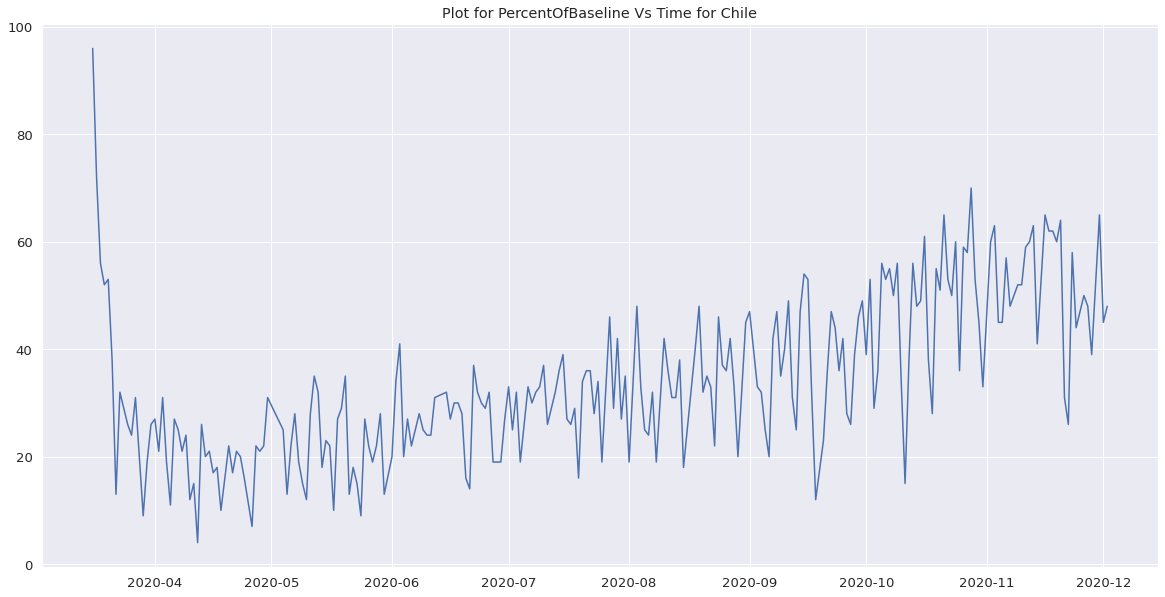

In [23]:
df_Chile = df[df['Country']=='Chile']
df_Chile = df_Chile.sort_values(by="Date")
df_Chile.set_index('Date',inplace=True)

plt.figure(figsize=(20,10))
plt.plot(df_Chile['PercentOfBaseline'])
plt.title("Plot for PercentOfBaseline Vs Time for Chile")
plt.show();